# Pivot Tables

The **pivot table** takes simple **column-wise data** as input, and groups the entries into a **two-dimensional table** that provides a multidimensional summarization of the data.  
The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [10]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Pivot Table Syntaz**

In [11]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Multi-level pivot tables**

In [16]:
age = pd.cut(titanic['age'], [0, 18, 80])
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table(values='survived', index=['sex', age], columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

**Additional pivot table options**

In [20]:
pd.pivot_table

<function pandas.core.reshape.pivot.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')>

The **aggfunc** keywords controls what type of aggregation is applied, which is a mean by default. As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., 'sum', 'mean', 'count', 'min', 'max', etc.) or a function that implements an aggregation (e.g., np.sum(), min(), sum(), etc.). Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [22]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the values keyword; when specifying a mapping for aggfunc, this determined automatically.

At times it's useful to compute totals along each grouping. This can be done via the **margins** keyword:

In [23]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


The margin label can be specified with the **margins_name** keyword, which defaults to "All".

**Example: Birthrate Data**

In [24]:
births = pd.read_csv('births.csv')

In [26]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

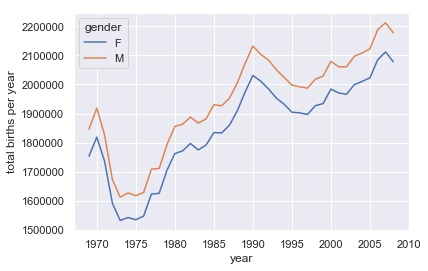

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()   # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

**Further data exploration**

In [28]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [29]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

In [31]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

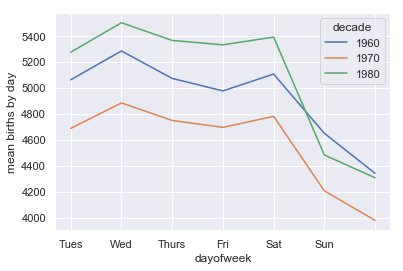

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');